In [3]:
import csv
import numpy as np
import matplotlib.pyplot as p
import math
import os
from os import walk
import scipy.io as sio

#folder = r'C:\Users\zomege\Documents\Machine Learning\Matlab\Training_Data_(Line_06)\\'

In [5]:
#Header of csv
#Date[0],Time[1],Depth of Airgun(m)[2],Depth of Reciever(m)[3],X Airgun[4],Y Airgun[5],Z Airgun[6],X_R1[7],Y_R1[8],Z_R1[9],SEL[10],RMS[11]
#Python array
#Depth of Airgun(m)[0],Depth of Reciever(m)[1],Range(m)[2],SEL[3],RMS[4]
#shape of data: ()
#saveLoc = r'C:\Users\zomege\Documents\Machine Learning\data.mat'
saveLoc = r'/home/zomege/Documents/machinelearninguw-master/data.mat'
if(not(os.path.isfile(saveLoc))):
    files = os.listdir(folder)
    length = len(files)
    data = np.zeros([length,636,5])
    f = 0#file index
    for filename in files:
        e = 0#hydrophone index
        dirname = folder+filename
        #print(dirname)
        if filename.endswith(".csv"): 
            with open(dirname) as csvFile:
                csvReader = csv.reader(csvFile)
                next(csvReader,None)#Skip header
                for row in csvReader:
                    range1 = math.sqrt((float(row[7])-float(row[4]))**2+(float(row[8])-float(row[5]))**2)#range = dist([X_R1,Y_R1],[X_Airgun,Y_airgun])
                    data[f,e] = [row[2],row[3],range1,row[10],row[11]]
                    e = e + 1
        f = f + 1 
    sio.savemat(saveLoc, mdict={'data': data})
else:
    save = sio.loadmat(saveLoc)
    data = save['data']

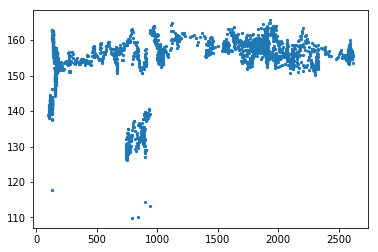

In [6]:
#SEL Plot
# gun depth data[:][200][0]
# SEL data[:][200][3]
xs = data[:,300,0]
ys = data[:,300,3]

p.scatter(xs,ys,s=5)
p.show()

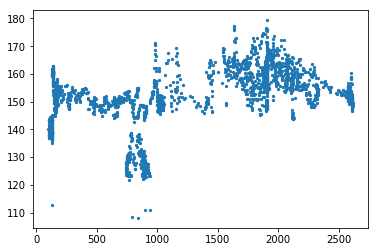

In [7]:
#RMS Plot
xr = data[:,200,0]
yr = data[:,200,4]

p.scatter(xr,yr,s=5)
p.show()

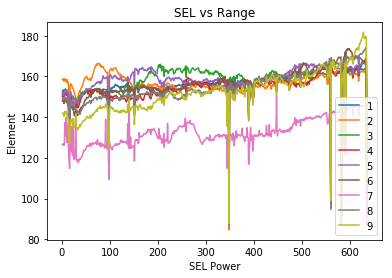

In [25]:
#SEL vs Range
#(2361, 636, 5)
#about 240 per reel, 10 reels
#Depth of Airgun(m)[0],Depth of Reciever(m)[1],Range(m)[2],SEL[3],RMS[4]
for i in range(0,9):
    y = data[100+i*240,range(1,636),3]
    p.plot(range(1,636),y)
p.legend(range(1,10))
p.title('SEL vs Range')
p.xlabel('SEL Power')
p.ylabel('Element')
p.legend()
p.show()

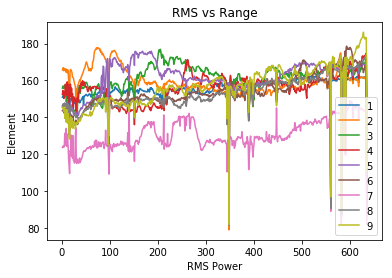

In [26]:
#RMS vs Range
for i in range(0,9):
    y = data[100+i*240,range(1,636),4]
    p.plot(range(1,636),y)
p.legend(range(1,10))
p.title('RMS vs Range')
p.xlabel('RMS Power')
p.ylabel('Element')
p.legend()
p.show()